In [26]:
# General
import numpy as np
import pandas as pd


# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
plt.style.use("seaborn")

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/telecom_users.csv')

In [30]:
df=df.drop(columns=['Unnamed: 0'])

In [31]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x: 'Yes' if x==1 else 'No')

In [32]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan, regex=True)
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [33]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


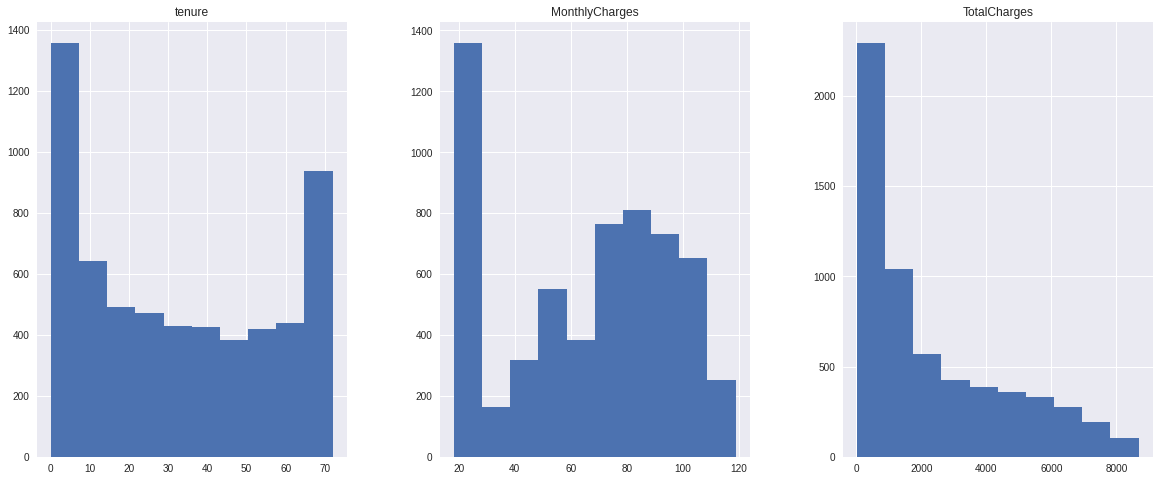

In [34]:
df.hist(figsize=(20,8),layout=(1,3));

In [35]:
df['Churn'].value_counts(normalize=True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

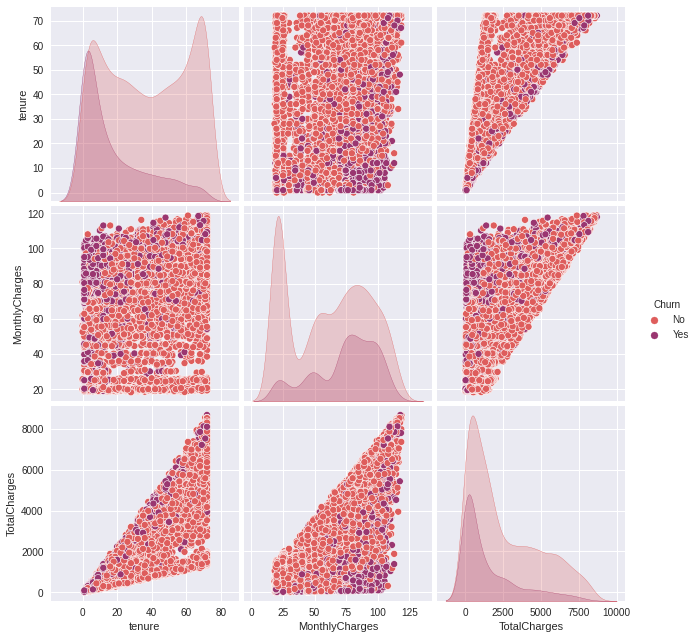

In [36]:

sns.pairplot(df, hue="Churn",palette='flare',height=3.0);


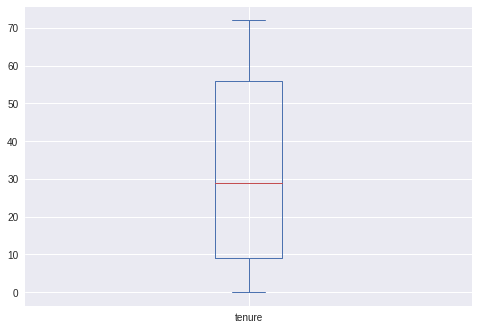

In [37]:
df['tenure'].plot.box();

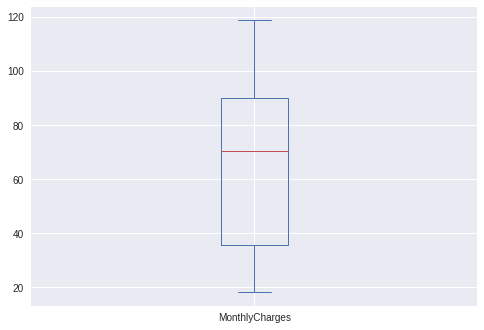

In [38]:
df['MonthlyCharges'].plot.box();

In [39]:
# Total Charge and Monthly Charges are correlated: drop Total Charges
# Map Senior Citizen to yes/no

In [40]:
df=df.drop(columns=['TotalCharges'])

In [41]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/telecom_users_clean.csv',index=False)

In [42]:
df.corr()

,tenure,MonthlyCharges
tenure,1.000000,0.256983
MonthlyCharges,0.256983,1.000000


In [43]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [44]:
for col in ['SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']:
  df[col]=df[col].apply(lambda x: 1 if x=='Yes'  else 0)

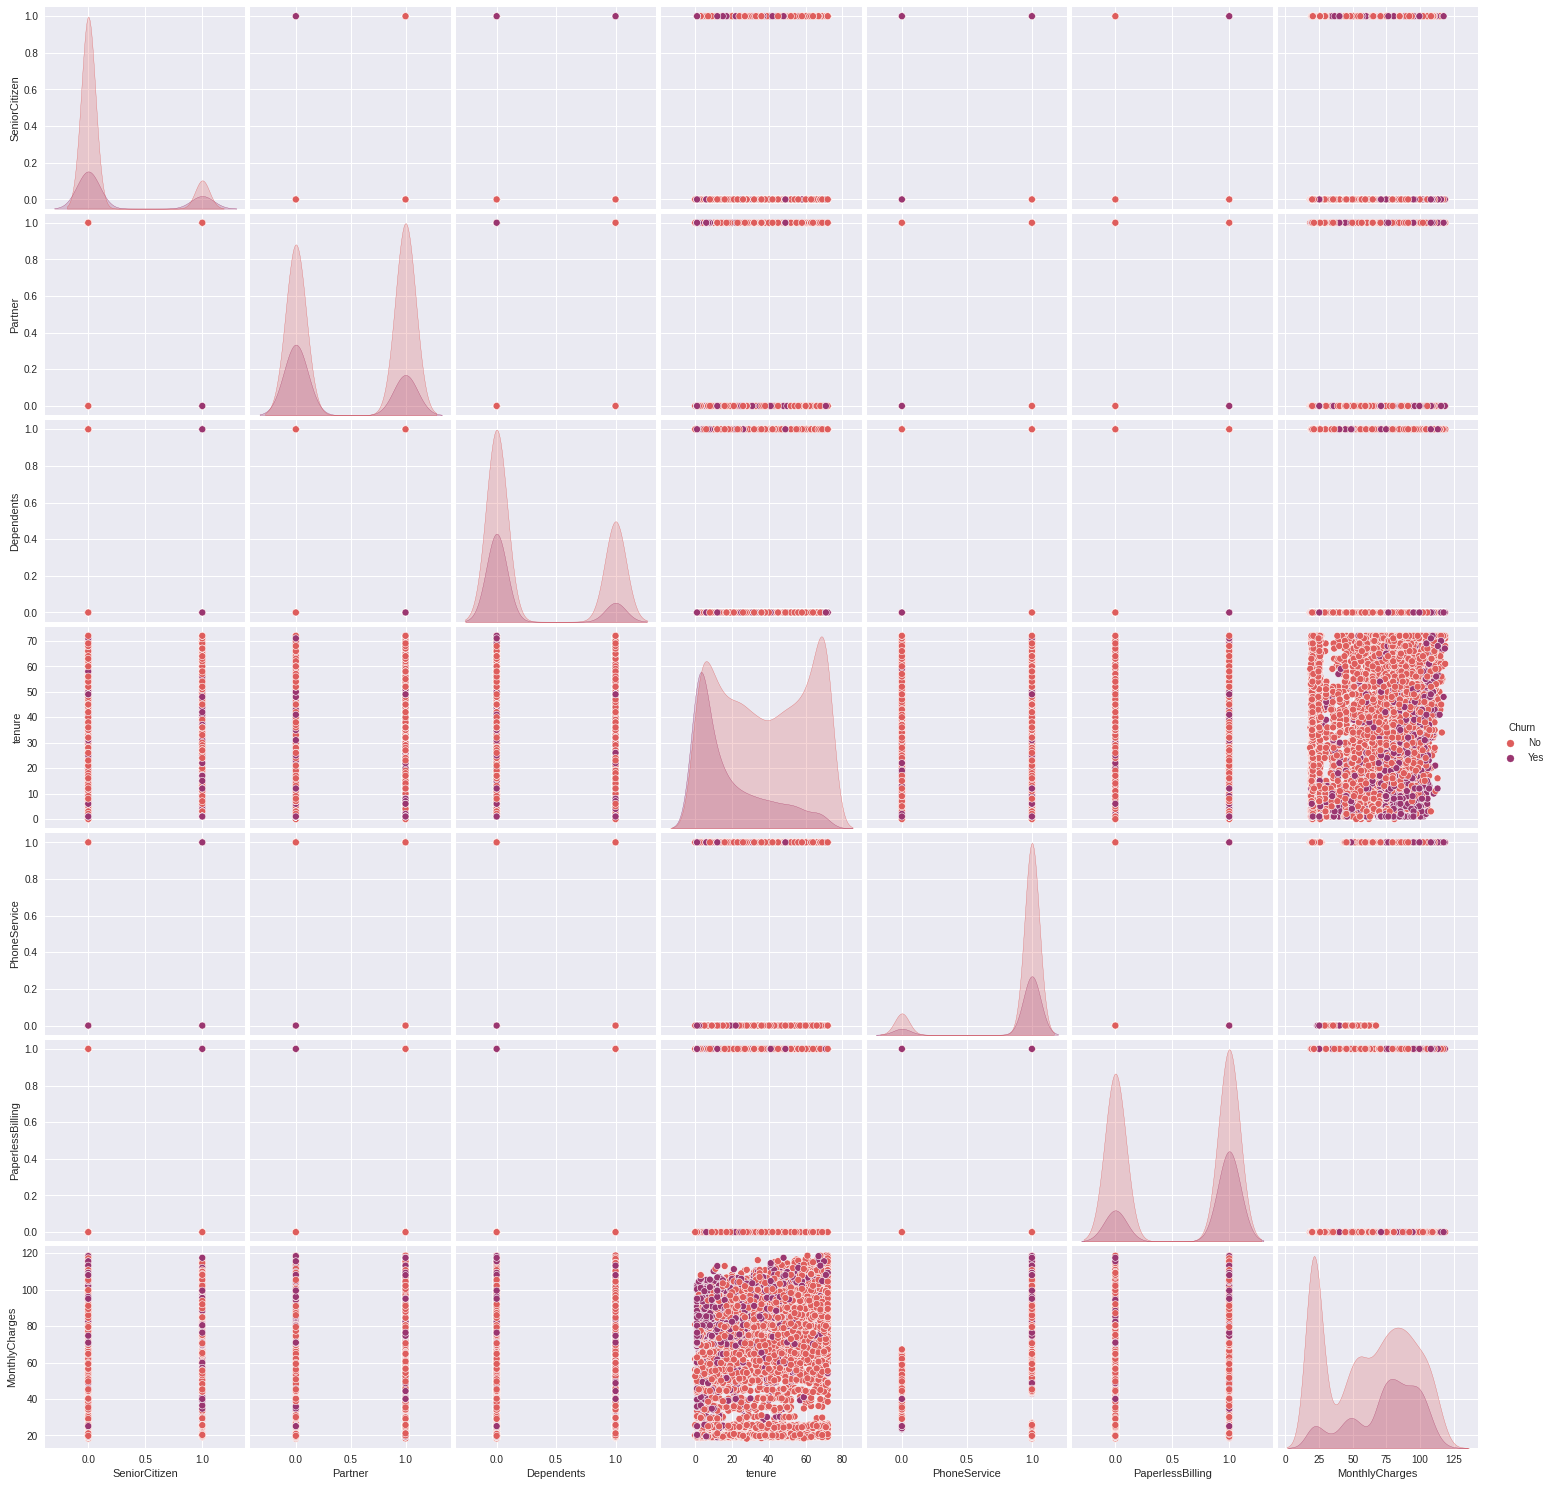

In [45]:
sns.pairplot(df, hue="Churn",palette='flare',height=3.0);